In [6]:
# Bloco 1: Importação de Bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [7]:
# Bloco 2: Preparação dos Dados
dados_praia = {
    'Sol': ['Sim', 'Sim', 'Sim', 'Não', 'Não', 'Não'],
    'Vento': ['Sim', 'Sim', 'Não', 'Não', 'Sim', 'Sim'],
    'Praia': ['Não', 'Não', 'Sim', 'Não', 'Não', 'Não']
}

df = pd.DataFrame(dados_praia)
X = df[['Sol', 'Vento']]
y = df['Praia']

print("Dados carregados:")
print(df)

Dados carregados:
   Sol Vento Praia
0  Sim   Sim   Não
1  Sim   Sim   Não
2  Sim   Não   Sim
3  Não   Não   Não
4  Não   Sim   Não
5  Não   Sim   Não


In [8]:
# Bloco 3: Pré-processamento
# Convertendo Sim/Não para 1/0
X = X.replace({'Sim': 1, 'Não': 0})
y = y.replace({'Sim': 1, 'Não': 0})

print("\nDados convertidos:")
print(pd.concat([X, y], axis=1))


Dados convertidos:
   Sol  Vento  Praia
0    1      1      0
1    1      1      0
2    1      0      1
3    0      0      0
4    0      1      0
5    0      1      0


<ipython-input-8-c7814323f55c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({'Sim': 1, 'Não': 0})
<ipython-input-8-c7814323f55c>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Sim': 1, 'Não': 0})


In [9]:
# Bloco 4: Modelagem
modelo = DecisionTreeClassifier(criterion='entropy', max_depth=2)
modelo.fit(X, y)

print("\nModelo treinado!")
print(f"Acurácia: {modelo.score(X, y):.2f}")


Modelo treinado!
Acurácia: 1.00


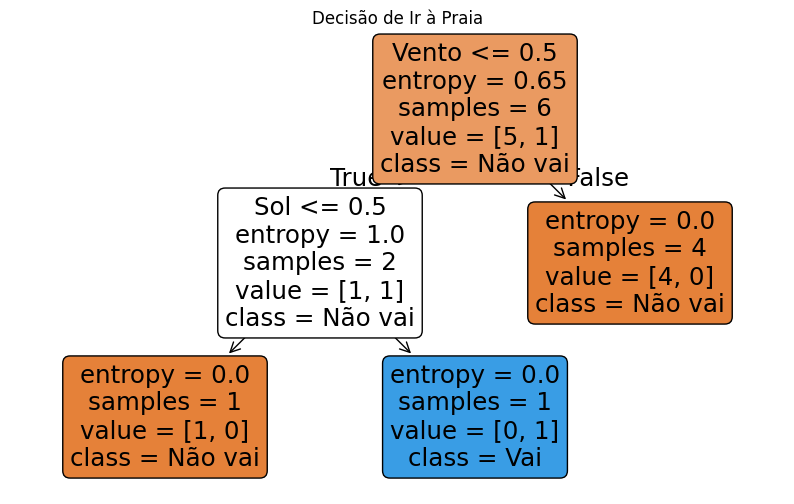

In [10]:
# Bloco 5: Visualização
plt.figure(figsize=(10,6))
plot_tree(modelo,
          feature_names=['Sol', 'Vento'],
          class_names=['Não vai', 'Vai'],
          filled=True,
          rounded=True)
plt.title("Decisão de Ir à Praia")
plt.show()

In [11]:
# Bloco 6: Regras de Decisão
print("\nRegras de decisão:")
print(export_text(modelo,
                feature_names=['Sol', 'Vento'],
                show_weights=True))


Regras de decisão:
|--- Vento <= 0.50
|   |--- Sol <= 0.50
|   |   |--- weights: [1.00, 0.00] class: 0
|   |--- Sol >  0.50
|   |   |--- weights: [0.00, 1.00] class: 1
|--- Vento >  0.50
|   |--- weights: [4.00, 0.00] class: 0



In [12]:
# Bloco 7: Previsões
def prever_praia(sol, vento):
    sol = 1 if sol == 'Sim' else 0
    vento = 1 if vento == 'Sim' else 0
    pred = modelo.predict([[sol, vento]])[0]
    return 'Vai' if pred == 1 else 'Não vai'

# Exemplos
print("\nExemplo 1 - Sol=Sim, Vento=Não:", prever_praia('Sim', 'Não'))
print("Exemplo 2 - Sol=Não, Vento=Sim:", prever_praia('Não', 'Sim'))
print("Exemplo 3 - Sol=Sim, Vento=Sim:", prever_praia('Sim', 'Sim'))


Exemplo 1 - Sol=Sim, Vento=Não: Vai
Exemplo 2 - Sol=Não, Vento=Sim: Não vai
Exemplo 3 - Sol=Sim, Vento=Sim: Não vai


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [14]:
# Bloco 8: Interpretação
print("\nInterpretação:")
print("1. O fator mais importante é ter sol (primeira divisão na árvore)")
print("2. Mesmo com sol, se tiver vento não vai à praia")
print("3. Sem sol, nunca vai à praia independente do vento")


Interpretação:
1. O fator mais importante é ter sol (primeira divisão na árvore)
2. Mesmo com sol, se tiver vento não vai à praia
3. Sem sol, nunca vai à praia independente do vento
